# Time Series Analysis of Engagement Metrics

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('../clean_data/processed.csv')

# change name of columns: 
# legal_entity_name	to company, and period_end_date	to date
df.rename(columns={'legal_entity_name': 'company', 'period_end_date': 'date'}, inplace=True)

# sort by company and date
df.head()

,legal_entity,date,followers,pictures,videos,comments,likes,close,content,likes_per_content,...,Close_price_weekly_change,comments_per_likes_ma_2,change_followers_ma_2,Close_price_weekly_change_ma_2,comments_per_likes_ma_3,change_followers_ma_3,Close_price_weekly_change_ma_3,comments_per_likes_ma_5,change_followers_ma_5,Close_price_weekly_change_ma_5
0,Academy Sports + Outdoors,10/24/20,170601,4,13,86,4678,17.230215,17,275.176471,...,19.047624,0.017899,0.201077,9.935337,0.016776,0.173332,8.204015,0.035013,0.193981,6.332030
1,Academy Sports + Outdoors,10/31/20,170948,5,13,84,4976,16.413008,18,276.444444,...,-4.742874,0.017632,0.187426,7.152375,0.017559,0.201851,5.042600,0.025851,0.187311,4.906167
2,Academy Sports + Outdoors,11/7/20,171121,5,11,79,4473,15.576114,16,279.562500,...,-5.098968,0.017271,0.152299,-4.920921,0.017642,0.158684,3.068594,0.016974,0.164919,2.954041
3,Academy Sports + Outdoors,11/14/20,171486,6,11,101,5384,16.324398,17,316.705882,...,4.804050,0.018210,0.157250,-0.147459,0.017767,0.172633,-1.679264,0.017820,0.184010,2.966576
4,Academy Sports + Outdoors,11/21/20,171787,5,11,99,4929,15.635190,16,308.062500,...,-4.221951,0.019422,0.194412,0.291050,0.018835,0.163341,-1.505623,0.018354,0.172975,1.957576


In [37]:
# count of companies
df['legal_entity'].nunique()

164

In [38]:
# columns
df.info()

# date to date type
df['date'] = pd.to_datetime(df['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46114 entries, 0 to 46113
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   legal_entity                      46114 non-null  object 
 1   date                              46114 non-null  object 
 2   followers                         46114 non-null  int64  
 3   pictures                          46114 non-null  int64  
 4   videos                            46114 non-null  int64  
 5   comments                          46114 non-null  int64  
 6   likes                             46114 non-null  int64  
 7   close                             46114 non-null  float64
 8   content                           46114 non-null  int64  
 9   likes_per_content                 46114 non-null  float64
 10  comments_per_likes                46114 non-null  float64
 11  likes_per_content_weekly_change   46114 non-null  float64
 12  foll

### Time series for one company: Estee Lauder

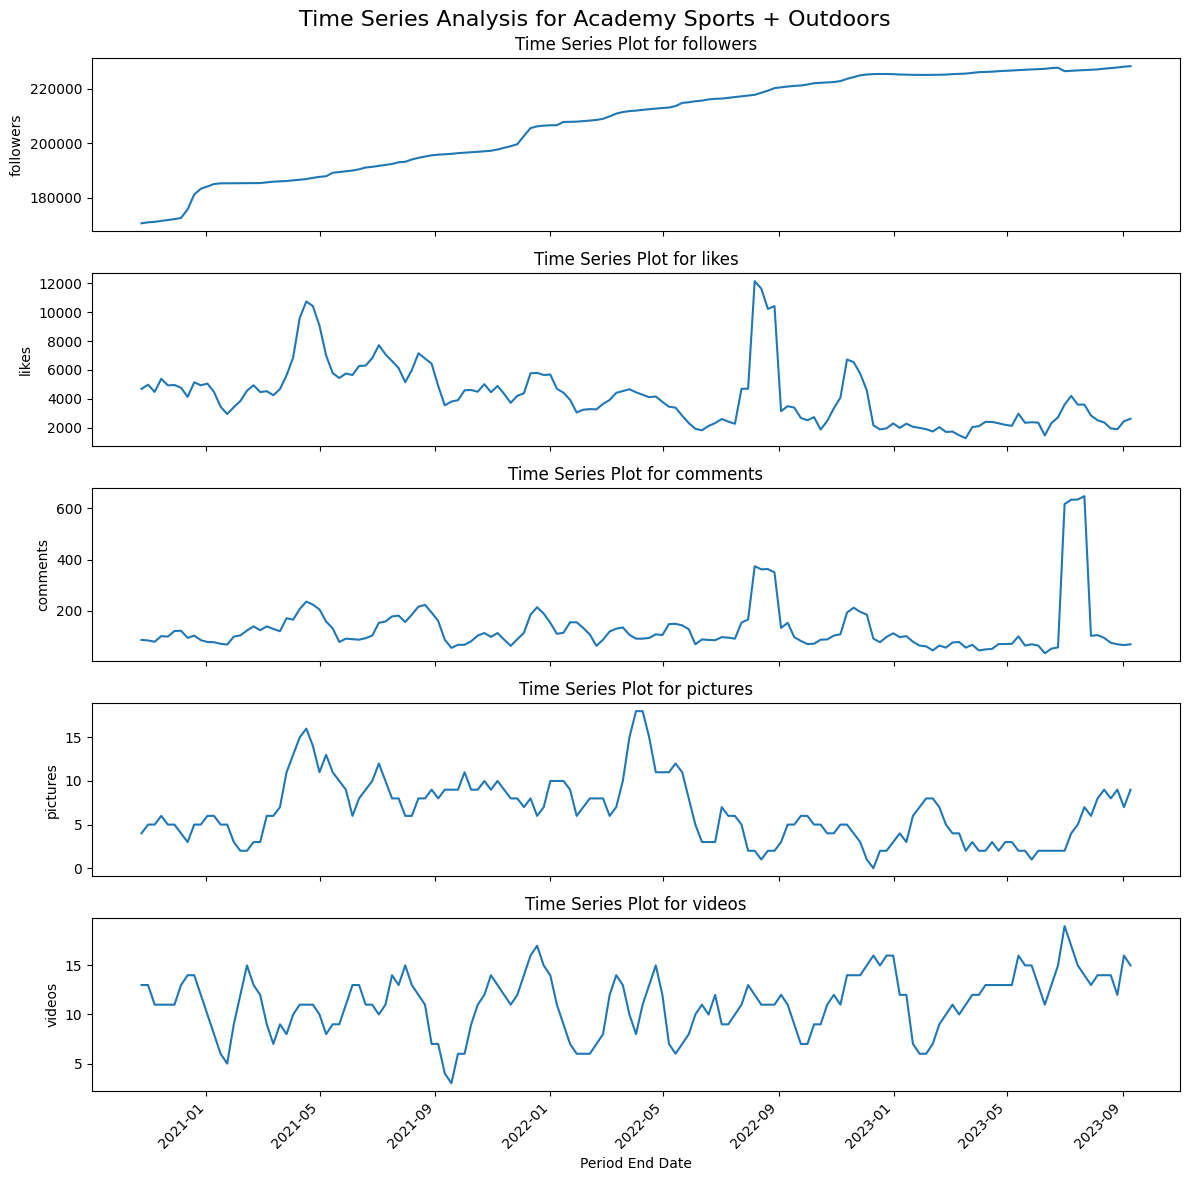

In [39]:
# pick first legal entity as example
lg_0_df = df[df['legal_entity'] == df['legal_entity'].unique()[0]]

# save name of legal entity
name = lg_0_df['legal_entity'].iloc[0]

# Metrics to plot
metrics = ['followers', 'likes', 'comments', 'pictures', 'videos']

# Proceed only if the DataFrame is not empty
if not lg_0_df.empty:
    fig, axs = plt.subplots(len(metrics), 1, figsize=(12, 12), sharex=True)

    for i, metric in enumerate(metrics):
        if lg_0_df[metric].notna().any():  # Check if there are any non-NaN values
            # title of the plot = name of the legal entity
            
            axs[i].plot(lg_0_df['date'], lg_0_df[metric], linestyle='-')
            axs[i].set_title(f'Time Series Plot for {metric}')
            axs[i].set_ylabel(metric)
            axs[i].ticklabel_format(style='plain', axis='y')
            fig.autofmt_xdate(rotation=45)

            max_value = lg_0_df[metric].max()
            max_points = lg_0_df[lg_0_df[metric] == max_value]
            if not max_points.empty:
                max_date = max_points['date'].iloc[0]
        else:
            axs[i].set_title(f"No data available for {metric}")

    fig.suptitle(f"Time Series Analysis for {name}", fontsize=16)  # Overall plot title
    plt.xlabel('Period End Date')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the specified legal entity.")

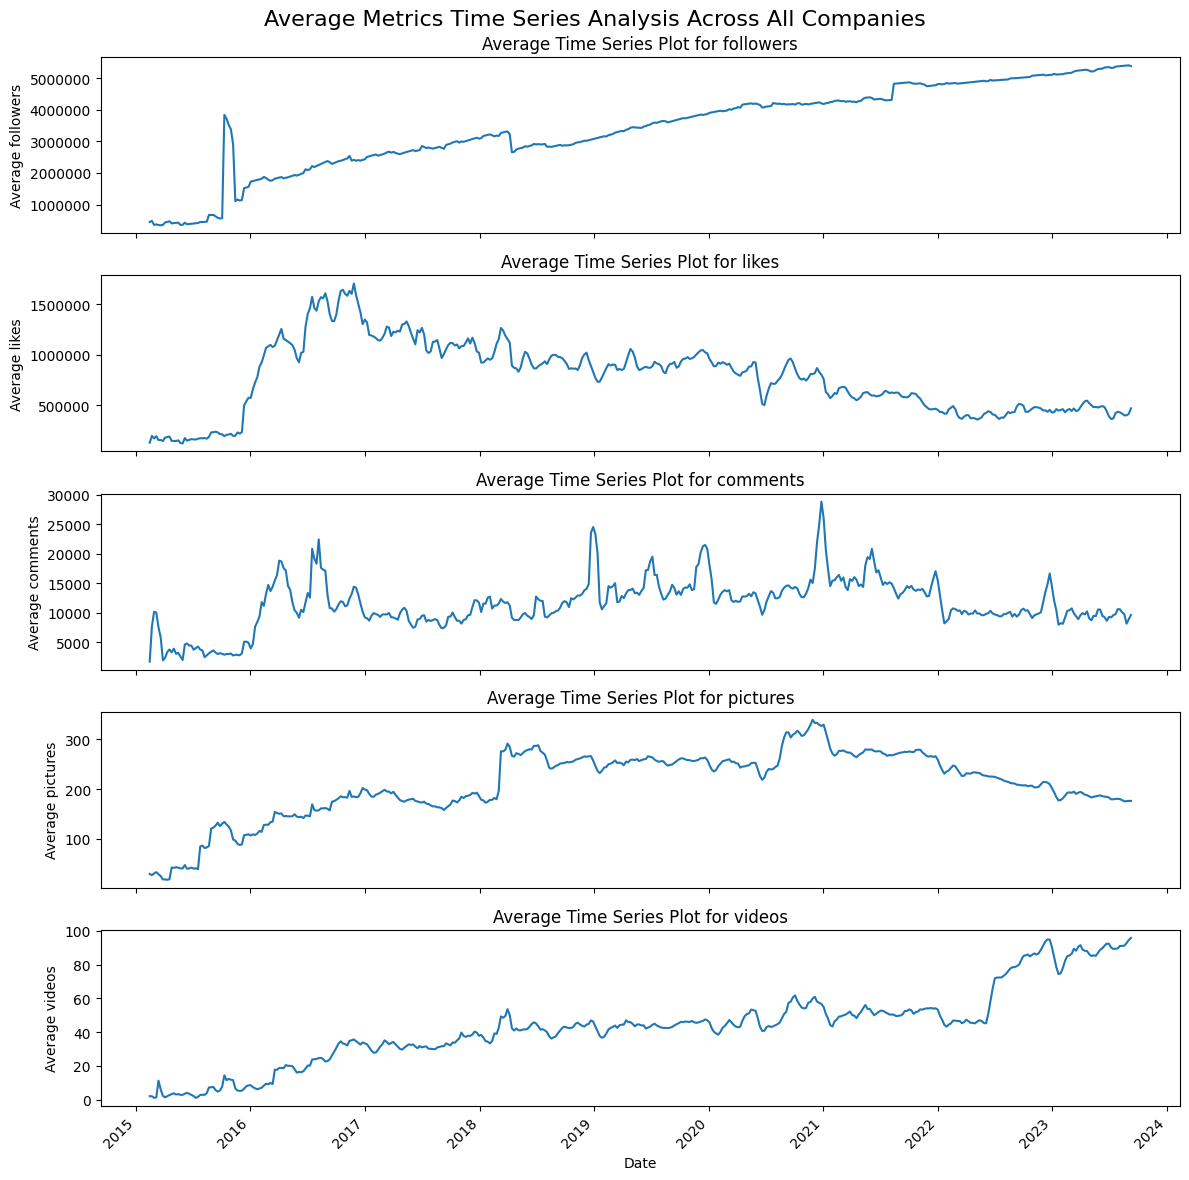

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame 'df' setup (ensure this matches your real DataFrame structure)
# df = pd.DataFrame({
#     'date': pd.to_datetime(['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02']),
#     'legal_entity': ['Company A', 'Company B', 'Company A', 'Company B'],
#     'followers': [100, 150, 200, 250],
#     'likes': [10, 15, 20, 25],
#     'comments': [5, 7, 8, 10],
#     'pictures': [2, 3, 4, 5],
#     'videos': [1, 1, 2, 2]
# })

# Metrics to plot
metrics = ['followers', 'likes', 'comments', 'pictures', 'videos']

# Group by date and calculate mean for each metric
average_df = df.groupby('date')[metrics].mean().reset_index()

# Check if the average DataFrame is not empty
if not average_df.empty:
    fig, axs = plt.subplots(len(metrics), 1, figsize=(12, 12), sharex=True)

    for i, metric in enumerate(metrics):
        # Plot the average values for each metric
        axs[i].plot(average_df['date'], average_df[metric], linestyle='-')
        axs[i].set_title(f'Average Time Series Plot for {metric}')
        axs[i].set_ylabel(f'Average {metric}')
        axs[i].ticklabel_format(style='plain', axis='y')

    fig.autofmt_xdate(rotation=45)  # Rotate date labels to make them more readable
    fig.suptitle('Average Metrics Time Series Analysis Across All Companies', fontsize=16)  # Overall plot title
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for averaging.")